In [26]:
%pylab notebook
import numpy as np
import pandas as pd
import os

from datetime import datetime
from cognite.config import configure_session
from cognite.v05.timeseries import get_datapoints_frame

Populating the interactive namespace from numpy and matplotlib


/Users/ktjolsen/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Authenticate
Use your API key to authenticate. Make sure that you have first set the API key as an environment variable.

The API key corresponds to a project, e.g. "akerbp".

In [27]:
configure_session(os.environ['COGNITE_API_KEY'], 'akerbp')

## Specify data
The data in the Cognite Data Platform is structured by assets, where an asset can be a specific piece of equipment or an equipment type. Read more about assets in the public API guide.

In order to explore data, it is useful to have either asset IDs or timeseries names to start from. You can then pull data corresponding to those assets or timeseries.

In [28]:
reservoir_ts_name = 'SKAP_18PI2303/Y/10sSAMP'
choke_ts_name  = 'SKAC_18-PT-2325'
pmv_ts_name  = 'SKAP_18PI2317/Y/10sSAMP'
all_ts_names = [reservoir_ts_name, choke_ts_name, pmv_ts_name]
print(all_tags)

['SKAP_18PI2303/Y/10sSAMP', 'SKAC_18-PT-2325', 'SKAP_18PI2317/Y/10sSAMP']


One way to pull data is using the function get_datapoints_frame. See reference documentation, http://cognite-sdk-python.readthedocs.io/en/latest/cognite.html#module-cognite.v05.timeseries. 

This function gets datapoints for given timeseries all on the same timestamps, saving you from otherwise interpolating to get the timeseries data on the same timestamps.
* Specifying a start and end time gives you data for the desired time range
* Granularity of 1 hour pulls a single aggregate value for all data points per hour
* Providing multiple aggregates pulls data using all the three aggregates


In [29]:
start = datetime(2014, 1, 1)
end = '1d-ago'
data = get_datapoints_frame(all_ts_names, start=start, end=end, granularity='1h', aggregates=['average', 'min', 'max'])

There are of course many ways to access data. Look at the "Exploring the Asset Hierarchy" notebook to learn how to find assets relevant to your task. With an asset ID, you can use e.g. get_timeseries to get the associated tiem series names. Read more in the timeseries docs (http://cognite-sdk-python.readthedocs.io/en/latest/cognite.html#module-cognite.v05.timeseries).

## Investigate data

The data is returned with the timeseries for the different aggregates in the columns.

In [30]:
data.head()

,timestamp,SKAC_18-PT-2325|average,SKAC_18-PT-2325|min,SKAC_18-PT-2325|max,SKAP_18PI2303/Y/10sSAMP|average,SKAP_18PI2303/Y/10sSAMP|min,SKAP_18PI2303/Y/10sSAMP|max,SKAP_18PI2317/Y/10sSAMP|average,SKAP_18PI2317/Y/10sSAMP|min,SKAP_18PI2317/Y/10sSAMP|max
0,1388534400000,NaN,NaN,NaN,289.101996,289.096771,289.109131,215.845173,215.775009,215.911789
1,1388538000000,NaN,NaN,NaN,289.103136,289.097595,289.108124,215.889387,215.833130,215.919464
2,1388541600000,NaN,NaN,NaN,289.095895,289.089447,289.101410,215.881827,215.790710,215.913834
3,1388545200000,NaN,NaN,NaN,289.088423,289.082947,289.095581,215.875001,215.819199,215.905579
4,1388548800000,NaN,NaN,NaN,289.080159,289.073761,289.085876,215.870124,215.766113,215.902588


Substitute missing values before plotting the data. Pandas has useful functionality for this, e.g. see
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html.

In [31]:
data = data.fillna(method='ffill')

VIsualize the data

<IPython.core.display.Javascript object>


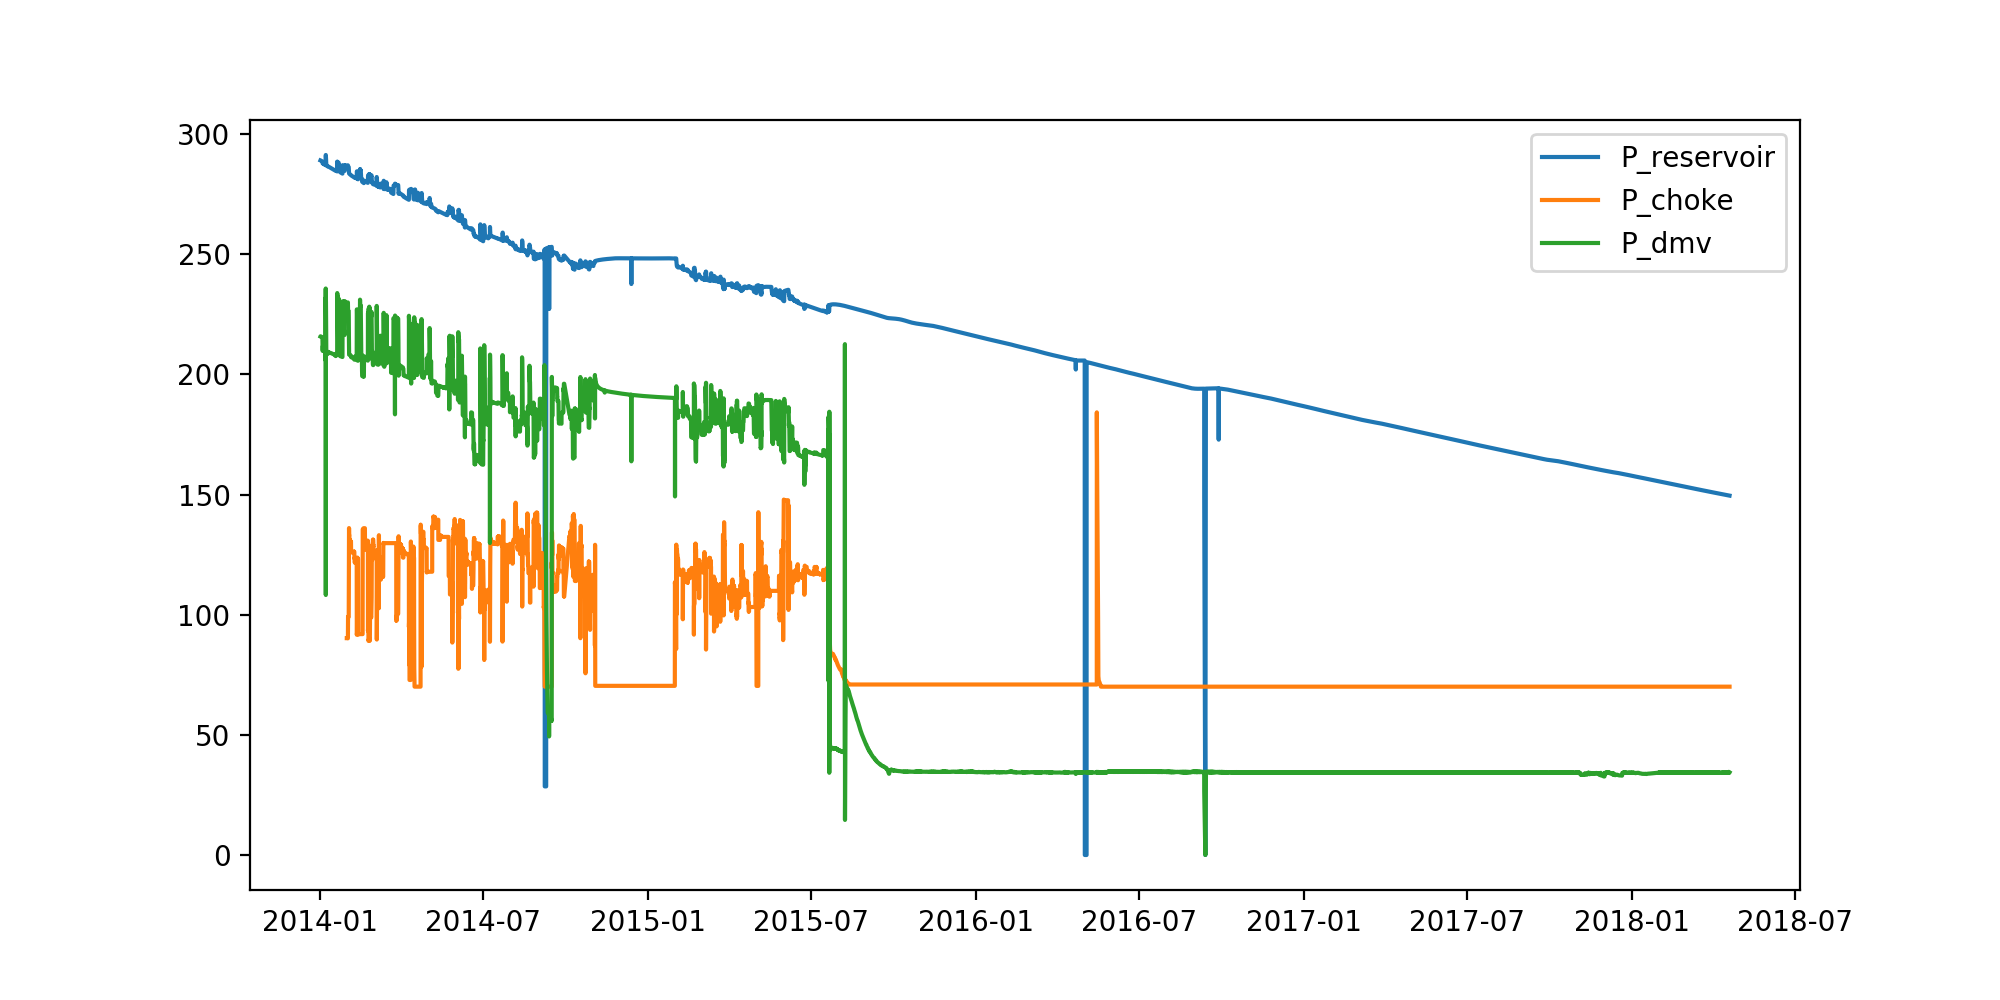

In [32]:
T = pd.to_datetime(data.timestamp, unit='ms')
plt.figure(figsize=(10, 5))
plt.plot(T, data[reservoir_ts_name+'|average'].values, label='P_reservoir')
plt.plot(T, data[choke_ts_name+'|average'].values, label='P_choke')
plt.plot(T, data[pmv_ts_name+'|average'].values, label='P_dmv')
plt.legend()
plt.show()